In [1]:
%pip install joblib

In [2]:
!git clone --filter=blob:none --no-checkout https://github.com/cloner174/mr.Sina
%cd mr.Sina
!git sparse-checkout init --cone
!git sparse-checkout add Archive/random_forest_model.joblib
!git sparse-checkout add input/
!git checkout

Cloning into 'mr.Sina'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 88 (delta 38), reused 47 (delta 13), pack-reused 0
Receiving objects: 100% (88/88), 19.05 KiB | 1.00 MiB/s, done.
Resolving deltas: 100% (38/38), done.
/content/mr.Sina
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 1), reused 9 (delta 0), pack-reused 0
Receiving objects: 100% (18/18), 13.84 MiB | 10.87 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (18/18), done.
Your branch is up to date with 'origin/main'.


In [3]:
import networkx as nx
import pandas as pd
import numpy as np
import joblib

In [4]:
# Loading the best model :

model_path = 'Archive/random_forest_model.joblib'
model_name = 'random_forest'

model = joblib.load(model_path)

In [5]:
print(model)

RandomForestClassifier(max_depth=100, min_samples_split=50, n_estimators=20,
                       random_state=42)


In [6]:
publisher_nodes_path = '/content/mr.Sina/input/publishers.csv'
advertiser_nodes_path = '/content/mr.Sina/input/advertisers.csv'
data_links_path = '/content/mr.Sina/input/links.csv'

In [17]:
publisher_nodes = pd.read_csv(publisher_nodes_path)
advertiser_nodes = pd.read_csv(advertiser_nodes_path)
data_links = pd.read_csv(data_links_path)

In [12]:
publisher_nodes.shape, advertiser_nodes.shape, data_links.shape

((9709, 19), (872, 16), (969395, 4))

In [18]:
#randomly select nodes !

#publisher_nodes = publisher_nodes.sample(frac=0.1, replace=True, random_state=16)
advertiser_nodes = advertiser_nodes.sample(frac=0.1, replace=True, random_state=16)

In [19]:
publisher_nodes.shape, advertiser_nodes.shape, data_links.shape

((9709, 19), (87, 16), (969395, 4))

In [20]:
advertiser_nodes = set(advertiser_nodes['Advertiser.ID'])
publisher_nodes = set(publisher_nodes['Media.App.Media...Media...Publisher.ID'])

In [109]:
min(advertiser_nodes), max(advertiser_nodes), min(publisher_nodes),max(publisher_nodes)

(3349, 53083, 192, 90163)

In [21]:
len(advertiser_nodes), len(publisher_nodes)

(79, 131)

In [ ]:
#

In [147]:
advertiser_nodes_guide_map = {"Advertisers" : []}
publisher_nodes_guide_map = {"Publishers" : [] }

In [148]:
for node in advertiser_nodes:
  advertiser_nodes_guide_map["Advertisers"].append(node)

for node in publisher_nodes:
  publisher_nodes_guide_map["Publishers"].append(node)

In [149]:
advertiser_nodes_guide_map = pd.DataFrame(advertiser_nodes_guide_map)
publisher_nodes_guide_map = pd.DataFrame(publisher_nodes_guide_map )

In [152]:
advertiser_nodes_guide_map.to_csv("advertiser_nodes_guide_map.csv", index = False)
publisher_nodes_guide_map.to_csv("publisher_nodes_guide_map.csv", index = False)

In [ ]:
#

In [22]:
condition = data_links['source'].isin(advertiser_nodes) | data_links['target'].isin(advertiser_nodes)

filtered_df1 = data_links[condition]

In [23]:

condition = data_links['source'].isin(publisher_nodes) | data_links['target'].isin(advertiser_nodes)

filtered_df2 = data_links[condition]

In [24]:
filtered_df1.shape, filtered_df2.shape

((1568, 4), (3034, 4))

In [25]:
filtered_df1.reset_index(inplace=True)
filtered_df2.reset_index(inplace=True)

In [26]:
nodes = list(filtered_df1['source'].unique())
nodes.extend(list(filtered_df1['target'].unique()))
nodes.extend(list(filtered_df2['source'].unique()))
nodes.extend(list(filtered_df2['target'].unique()))

In [27]:
len(nodes)

3218

In [28]:
bunch_of_edges = []

for i in range(filtered_df1.shape[0]) :
  temp = ( filtered_df1.loc[i,'source'] , filtered_df1.loc[i,'target'] , filtered_df1.loc[i,'key'] )
  bunch_of_edges.append(temp)


for i in range(filtered_df2.shape[0]) :

    temp = ( filtered_df2.loc[i,'source'] , filtered_df2.loc[i,'target'] , filtered_df2.loc[i,'key'] )
    bunch_of_edges.append(temp)


In [29]:
len(bunch_of_edges), len(bunch_of_edges[0]), bunch_of_edges[0]

(4602, 3, (253, 8657, 0))

In [30]:
G = nx.Graph()

In [31]:
G.add_nodes_from(nodes)

In [32]:
G.add_weighted_edges_from(bunch_of_edges)

××

len(G.nodes)  =  1843

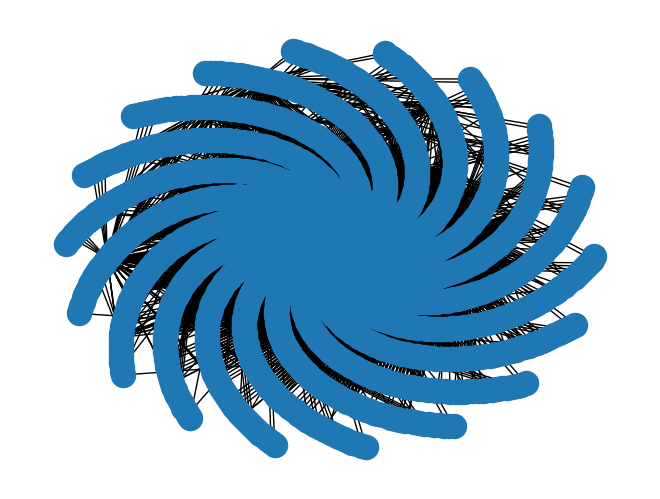

In [48]:
nx.draw(G, pos=nx.spiral_layout(G))

**Options for layout :**

['arf_layout',
'bfs_layout',
 'bipartite_layout',
 'circular_layout',
 'fruchterman_reingold_layout',
 'kamada_kawai_layout',
 'multipartite_layout',
 'np_random_state',
 'nx',
 'planar_layout',
 'random_layout',
 'rescale_layout',
 'rescale_layout_dict',
 'shell_layout',
 'spectral_layout',
 'spiral_layout',
 'spring_layout']

In [49]:
# Centrality Measures :

def calculate_centrality_measures(G):
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    return degree_centrality, betweenness_centrality, closeness_centrality

In [50]:

from itertools import combinations

# Graph
degree_centrality, betweenness_centrality, closeness_centrality = calculate_centrality_measures(G)
features = []
labels = []
# Calculating features for each pair of nodes:
for node1, node2 in combinations(G.nodes(), 2):

    # Centrality measures for node1 and node2
    degree_centrality_1 = degree_centrality[node1]
    degree_centrality_2 = degree_centrality[node2]
    betweenness_centrality_1 = betweenness_centrality[node1]
    betweenness_centrality_2 = betweenness_centrality[node2]
    closeness_centrality_1 = closeness_centrality[node1]
    closeness_centrality_2 = closeness_centrality[node2]

    # Directly compute and append features
    features.append((
        node1,
        node2,
        len(list(nx.common_neighbors(G, node1, node2))),  # Common Neighbors
        next(nx.preferential_attachment(G, [(node1, node2)]))[2],  # Preferential Attachment
        next(nx.resource_allocation_index(G, [(node1, node2)]))[2],  # Resource Allocation
        next(nx.adamic_adar_index(G, [(node1, node2)]))[2],  # Adamic Adar
        next(nx.jaccard_coefficient(G, [(node1, node2)]))[2] , # Jaccard Coefficient
        (degree_centrality_1 + degree_centrality_2) / 2,
        (betweenness_centrality_1 + betweenness_centrality_2) / 2,
        (closeness_centrality_1 + closeness_centrality_2) / 2
    ))
    # Existence of links between nodes (1 or 0)
    labels.append(1 if G.has_edge(node1, node2) else 0)

# Creating a DataFrame from the features and labels
features_df = pd.DataFrame(features,
                           columns=['node1','node2','Common Neighbors',
                                    'Preferential Attachment', 'Resource Allocation',
                                    'Adamic Adar', 'Jaccard Coefficient', 'Average Degree Centrality',
                                    'Average Betweenness Centrality', 'Average Closeness Centrality'])
features_df['laybel'] = labels
#We record the laybels to further use it to filter features_df with none edges nodes!


In [51]:
features_df.to_csv("from index4.0.ipynb.csv", index=False)

In [96]:
#features_df = pd.read_csv("from index4.0.ipynb.csv")

In [90]:
features_df.shape

(1697403, 11)

In [99]:
condition = features_df['laybel'] == 0
features_df_filter = features_df[condition]

In [100]:
features_df_filter.shape

(1692873, 11)

In [101]:
features_df_filter = features_df_filter.iloc[80000:80000+80000,:]
features_df_filter

In [107]:
#Also save  alighter version
features_df_filter.to_csv("from index4.0.ipynb_light.csv", index=False)

In [103]:
X = features_df_filter.drop(['node1', 'node2', 'laybel' ], axis = 1)

In [104]:
predicts_straight = model.predict(X)

In [105]:
predicts = model.predict_proba(X)[:, 1]

In [ ]:
#:  بیشترین احتمال کانکتی را در نظر میگیریم

In [106]:
max(predicts)

0.8902114945112585

In [60]:
features_df_filter.drop('laybel',axis = 1, inplace=True)

<ipython-input-60-3a2dd73a274b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df_filter.drop('laybel',axis = 1, inplace=True)


In [61]:
features_df_filter['predicted_laybel'] = predicts

<ipython-input-61-b57f830f9081>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df_filter['predicted_laybel'] = predicts


In [63]:

# Create a boolean mask based on the condition
condition = features_df_filter['predicted_laybel'] > 0.79

# Specify the columns you want to keep
columns_to_keep = ['node1', 'node2', 'predicted_laybel']

# Apply the boolean mask and select only the specified columns to filter the DataFrame
final_predicted = features_df_filter.loc[condition, columns_to_keep]

# Display the filtered DataFrame
print(final_predicted)


         node1  node2  predicted_laybel
7051       497   1867          0.792486
8889       515   1867          0.792486
29041      768   1867          0.792486
58137     1264   1867          0.792486
124441    2651   1867          0.792486
...        ...    ...               ...
1649297   1867   4299          0.792486
1649305   1867   4573          0.792486
1649309   1867   4631          0.792486
1649310   1867   4705          0.792486
1649311   1867   4784          0.792486

[1253 rows x 3 columns]


In [64]:
final_predicted.to_csv('final_predicted.csv', index=False)